In [ ]:
# Installing latest tensorflow GPU
!pip install tensorflow-gpu==2.3.1

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D,Dropout,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from keras.utils import plot_model
#from tensorflow.keras.optimizers import Adam


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

#### Getting data from drive and preprocessing using ImageDataGenerator

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# setting parameters
image_height =32
image_width = 32
# Processing 10 images at a time
batch_size = 10

In [ ]:
# Getting access  to training,test and validation data
training_data_dir = '/content/drive/MyDrive/NHCR_DATASET/Training_Dataset/Training'
validation_data_dir = '/content/drive/MyDrive/NHCR_DATASET/Validation_Dataset/Validation'
testing_data_dir = '/content/drive/MyDrive/NHCR_DATASET/Testing_Dataset/Testing'

# Generating training, validation and testing data 
# using ImageDataGenerator

datagen = ImageDataGenerator(1./255.0)

# Training data
training_data_generator = datagen.flow_from_directory(training_data_dir,target_size=(image_width,image_height),batch_size = batch_size)
# Validation data
validation_data_generator = datagen.flow_from_directory(validation_data_dir,target_size=(image_width,image_height),batch_size = batch_size)
# Testing data
# why shuffle is set to False?
testing_data_generator = datagen.flow_from_directory(testing_data_dir,target_size=(image_width,image_height),batch_size = batch_size,shuffle= False)
# why .reset() method is applied to only the testing_data_generator ?
testing_data_generator.reset()

Found 25241 images belonging to 36 classes.
Found 5409 images belonging to 36 classes.
Found 5401 images belonging to 36 classes.


In [ ]:
len(training_data_generator),len(validation_data_generator),len(testing_data_generator)

(2525, 541, 541)

In [ ]:
labels = training_data_generator.class_indices
labels
# labels = dict((a,b) for a,b in labels.items())
# labels

{'क': 0,
 'कं': 1,
 'कः': 2,
 'का': 3,
 'कि': 4,
 'की': 5,
 'कु': 6,
 'कू': 7,
 'के': 8,
 'कै': 9,
 'को': 10,
 'कौ': 11,
 'ख': 12,
 'खं': 13,
 'खः': 14,
 'खा': 15,
 'खि': 16,
 'खी': 17,
 'खु': 18,
 'खू': 19,
 'खे': 20,
 'खै': 21,
 'खो': 22,
 'खौ': 23,
 'ग': 24,
 'गं': 25,
 'गः': 26,
 'गा': 27,
 'गि': 28,
 'गी': 29,
 'गु': 30,
 'गू': 31,
 'गे': 32,
 'गै': 33,
 'गो': 34,
 'गौ': 35}

In [ ]:
# Getting classes for future use
labels_ = dict((v,k) for k,v in labels.items())
class_names = [labels_[v] for v in labels_]
class_names

['क',
 'कं',
 'कः',
 'का',
 'कि',
 'की',
 'कु',
 'कू',
 'के',
 'कै',
 'को',
 'कौ',
 'ख',
 'खं',
 'खः',
 'खा',
 'खि',
 'खी',
 'खु',
 'खू',
 'खे',
 'खै',
 'खो',
 'खौ',
 'ग',
 'गं',
 'गः',
 'गा',
 'गि',
 'गी',
 'गु',
 'गू',
 'गे',
 'गै',
 'गो',
 'गौ']

In [ ]:
# class_names_ = ['ka','chhe','kha','ga','gha','na','cha','chha','ja','gya','jha','na','ta','tha','da','dha','na','ta','tra','tha','da','dha','na','pa','pha','ba','bha','ma','ya','ra','la','wa','sa','sha','sa','ha','sunya','ek','dui','tin','char','panch','chha','sat','aath','nau']
# len(class_names_)

### **Building CNN**

In [ ]:
# model = Sequential()
# model.add(Conv2D(64,5,activation='relu',input_shape=(image_height,image_width,3)))


# model.add(MaxPool2D())
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Conv2D(32,3,activation='relu'))
# model.add(MaxPool2D())
# model.add(Dropout(0.1))

# model.add(Flatten())
# model.add(Dense(256,activation='relu'))
# model.add(Dense(46,activation='softmax'))

model = Sequential([
Conv2D(64,5,input_shape=(image_height,image_width,3)),
BatchNormalization(),
Activation('relu'),
MaxPool2D(),
Dropout(0.2),

Conv2D(32,3),
BatchNormalization(),
Activation('relu'),
MaxPool2D(),
Dropout(0.3),

Flatten(),
Dense(256),
Activation('relu'),
Dense(36),
Activation('softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 32)       

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Defining number of epochs before training  to get epochs value for plotting learning curve
### Start your code here ###
# replace 1 with desired number of epochs
epochs = 100
### End your code here ###

# callback
### start your code here
# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("/content/drive/My Drive/Saved_models/nhcr_model1.h5")
# early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights = True)
### end your code here

In [ ]:
# To save training and validation loss and accuracy
history = model.fit_generator(generator = training_data_generator,epochs=epochs,steps_per_epoch = len(training_data_generator),validation_data = validation_data_generator,validation_steps= len(validation_data_generator))
# Callback
# history = model.fit_generator(generator = training_data_generator,epochs=epochs,steps_per_epoch = len(training_data_generator),validation_data = validation_data_generator,validation_steps= len(validation_data_generator),
#                               callbacks =[checkpoint_cb,early_stopping_cb])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
2525/2525 [==============================] - 8505s 3s/step - loss: 2.3973 - accuracy: 0.3337 - val_loss: 0.8917 - val_accuracy: 0.7084
Epoch 2/100
2525/2525 [==============================] - 114s 45ms/step - loss: 0.5799 - accuracy: 0.8130 - val_loss: 0.5917 - val_accuracy: 0.8050
Epoch 3/100
2525/2525 [==============================] - 115s 45ms/step - loss: 0.3561 - accuracy: 0.8876 - val_loss: 0.4897 - val_accuracy: 0.8475
Epoch 4/100
2525/2525 [==============================] - 115s 45ms/step - loss: 0.2616 - accuracy: 0.9160 - val_loss: 0.4468 - val_accuracy: 0.8650
Epoch 5/100
2525/2525 [==============================] - 114s 45ms/step - loss: 0.2025 - accuracy: 0.9354 - val_loss: 0.4316 - val_accuracy: 0.8708
Epoch 6/100
2525/2525 [==============================] - 115s 45ms/step - loss: 0.1658 - accuracy: 0.9466 - val_loss: 0.3967 - val_accuracy: 0.8893
Epoch 7/100
2525/2525 [==============================] - 115s 46ms/step - loss: 0.1433 - accuracy: 0.9551 - val_l

In [ ]:
# Saving what  model structure looks like for future documentation purpose
plot_model(model, to_file='/content/drive/MyDrive/npn_warehouse/devanagari_character_recognition_36_02.png',show_shapes =
True)

###**Saving Model to Google Drive for future use**

In [ ]:
# Saving above model  in  .h5 format   in drive location content/drive/My Drive/Saved_models/{name of model.h5}
# Change directory according to your directory structure
model.save('/content/drive/MyDrive/npn_warehouse/devanagari_character_recognition_36_02.h5')

### **Plotting Learning curve: To see how model performs training and validation**

In [ ]:
def plot_learning_curve(epochs,history):
  # Plotting training and validation accuracy
  epochs = range(1,epochs+1)
  plt.plot(epochs,history.history['accuracy'])
  plt.plot(epochs,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.show()

  # Plotting training and validation loss
  epochs = range(1,epochs+1)
  plt.plot(epochs,history.history['loss'])
  plt.plot(epochs,history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.show()
  

In [ ]:
plot_learning_curve(epochs,history)

NameError: ignored

# **Testing model**

###**Single character testing**

In [ ]:
# value can range from 0 to 45 (class index)
def get_character_label(value):
  # To get the class labels the images in test dataset belong to.
  # Getting class indices of training_data_generator
  labels = (training_data_generator.class_indices)

  # Reversing key value pairs
  # Example
  # Reversing 'ट': 12
  # To make 12: 'ट'
  prediction_labels = dict((v,k) for k,v in labels.items())
  print('Index : "Label" mapping of  training classes are: {}'.format(prediction_labels))

  prediction_character= [prediction_labels[k] for k in [value]]
  return prediction_character[0]

In [ ]:
# To plot input testing image
def plot_input_testing_character(character_dir):
  import cv2 
  testing_character = cv2.imread(character_dir,3) 
  print('*********************************Your Input Image is:*****************************************   ')
  # plotting input image
  print('Size of input image is :{}'.format(testing_character.shape))
  testing_character = cv2.resize(testing_character,(32,32))
  plt.imshow(testing_character)
  return testing_character


In [ ]:
def predict_character(testing_character,model_dir):

    from tensorflow.keras.models import load_model
    print('size  of  testing image is : {}'.format(testing_character.shape))

    # Making our image 4D inorder to testing
    # expanding dimension from axis 0
    testing_character_4d= np.expand_dims(testing_character,axis=(0))
    print('size of testing image after expanding dimension is : {}'.format(testing_character_4d.shape))

    # Loading model
    model = load_model(model_dir)

    print('\n******************************Prediction*************************************************')
    # Testing above character
    predict_character = model.predict(testing_character_4d)

    #  Find -> For which character index model predict high probhability
    print('\nModel predict probabilty of all characters in array: {}'.format(predict_character))

    # Return the index of image classes
    # from 0 to 45
    # Which has high probability prediction
    character_index= np.argmax(predict_character)
    print(character_index)

    # Getting label from character_index
    # Calling function get_character_label
    character_label_= get_character_label(character_index)
    print('\nYour Input testing character is : {}'.format(character_label_))






In [ ]:
# Change directory according to your directory structure
character_directory ='/content/drive/MyDrive/npn_warehouse/testing_data/kha_test_1.jpg'
model_directory = '/content/drive/MyDrive/npn_warehouse/Model_rishav_pant_dataset.h5'

*********************************Your Input Image is:*****************************************   
Size of input image is :(128, 128, 3)


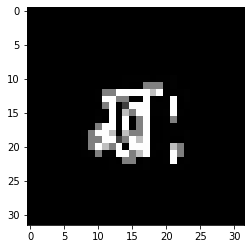

In [ ]:
# Plot input testing character
testing_character = plot_input_testing_character(character_directory)

In [ ]:
# Get predicted character label from your input testing character
predict_character(testing_character,model_directory)

size  of  testing image is : (32, 32, 3)
size of testing image after expanding dimension is : (1, 32, 32, 3)

******************************Prediction*************************************************

Model predict probabilty of all characters in array: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
33
Index : "Label" mapping of  training classes are: {0: 'क', 1: 'कं', 2: 'कः', 3: 'का', 4: 'कि', 5: 'की', 6: 'कु', 7: 'कू', 8: 'के', 9: 'कै', 10: 'को', 11: 'कौ', 12: 'ख', 13: 'खं', 14: 'खः', 15: 'खा', 16: 'खि', 17: 'खी', 18: 'खु', 19: 'खू', 20: 'खे', 21: 'खै', 22: 'खो', 23: 'खौ', 24: 'ग', 25: 'गं', 26: 'गः', 27: 'गा', 28: 'गि', 29: 'गी', 30: 'गु', 31: 'गू', 32: 'गे', 33: 'गै', 34: 'गो', 35: 'गौ'}

Your Input testing character is : गै


In [ ]:
## **What happens if we resized 32*32 image into 128*128 image**
import cv2 
import matplotlib.pyplot as plt
testing_character = cv2.imread(character_directory,3) 
print('*********************************Your Input Image is:*****************************************   ')
# plotting input image
print('Size of input image is :{}'.format(testing_character.shape))
print('Converting input image into 128*128 sized image')
testing_character = cv2.resize(testing_character,(128,128))
plt.imshow(testing_character)


## **Testing model and plotting confusion matrix**

#### Loading Model from drive

In [ ]:
model= load_model('/content/drive/MyDrive/npn_warehouse/devanagari_character_recognition_108_01.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 32)       

In [ ]:
# Testing model
# Verbose is helpful to show progress bar
test_pred = model.predict_generator(testing_data_generator,steps = (testing_data_generator.samples/testing_data_generator.batch_size),verbose =1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


540/540 [==============================] - 1362s 3s/step


In [ ]:
# Let see how test_pred look like
test_pred.shape

(5401, 36)

In [ ]:
# We need only one class label having high probability
test_pred_ = np.argmax(test_pred, axis=1)

In [ ]:
# Shape of test_pred_
test_pred_.shape

(5401,)

#### Plotting confusion matrix

In [ ]:
# To plot confusion matrix , first we need two parameters
# Testing image actual class labels
#  testing image predicted class labels

In [ ]:
# Testing image actual class labels
testing_data_generator.classes

array([ 0,  0,  0, ..., 35, 35, 35], dtype=int32)

In [ ]:
cm = confusion_matrix(testing_data_generator.classes,test_pred_) 

In [ ]:
# How confusion matrix look like
cm.shape

(36, 36)

Plotting confusion matrix with the help of mlxtend library





In [ ]:
# Plotting confusion matrix using mlxtend library
! pip install mlxtend

(<Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f493686f750>)

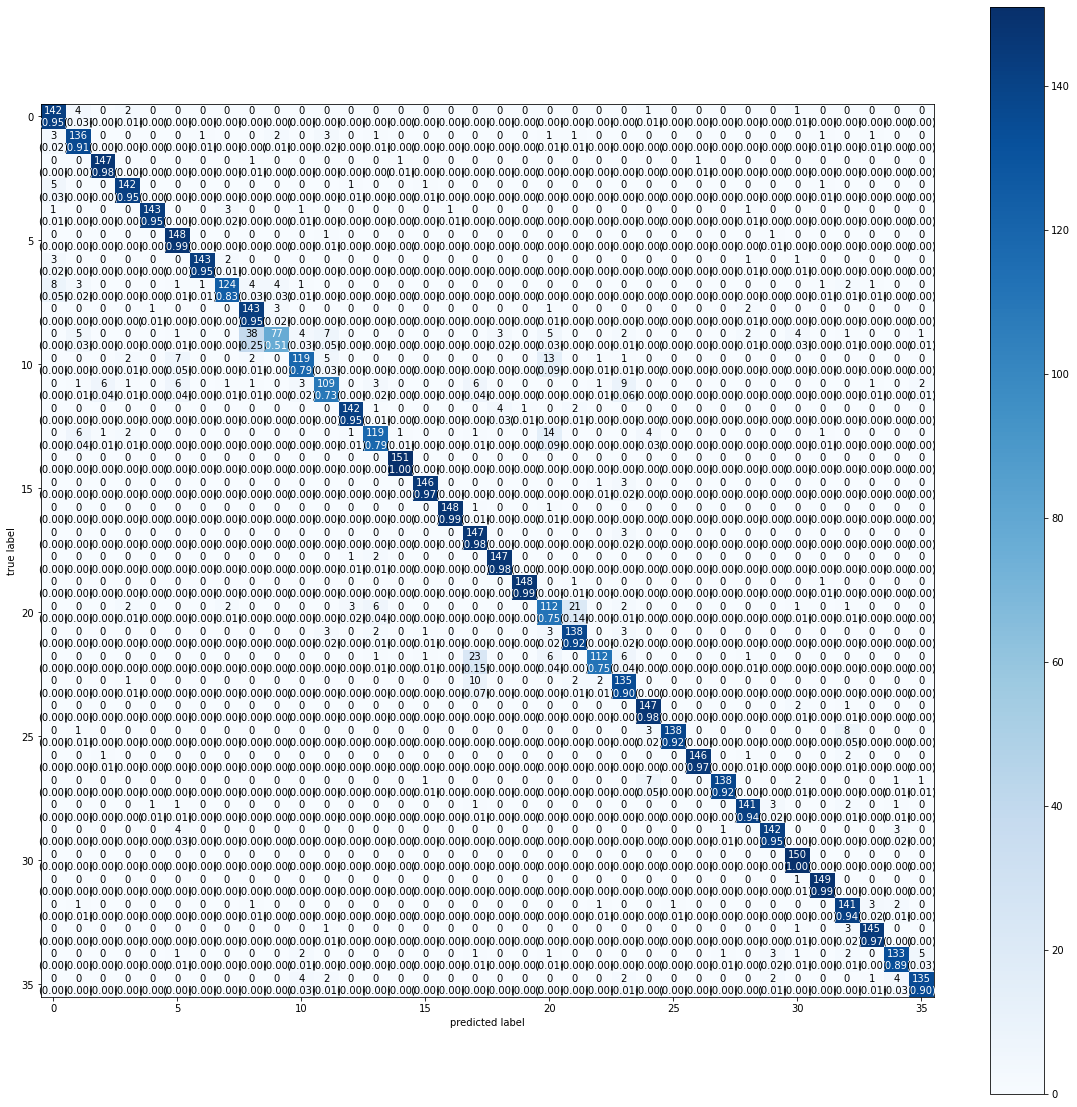

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm,
                                figsize=(20,20),
                                show_normed=True,
                                colorbar=True)
# class_name = classes argument not works why?

Plotting confusion matrix with the help of Seaborn heatmap

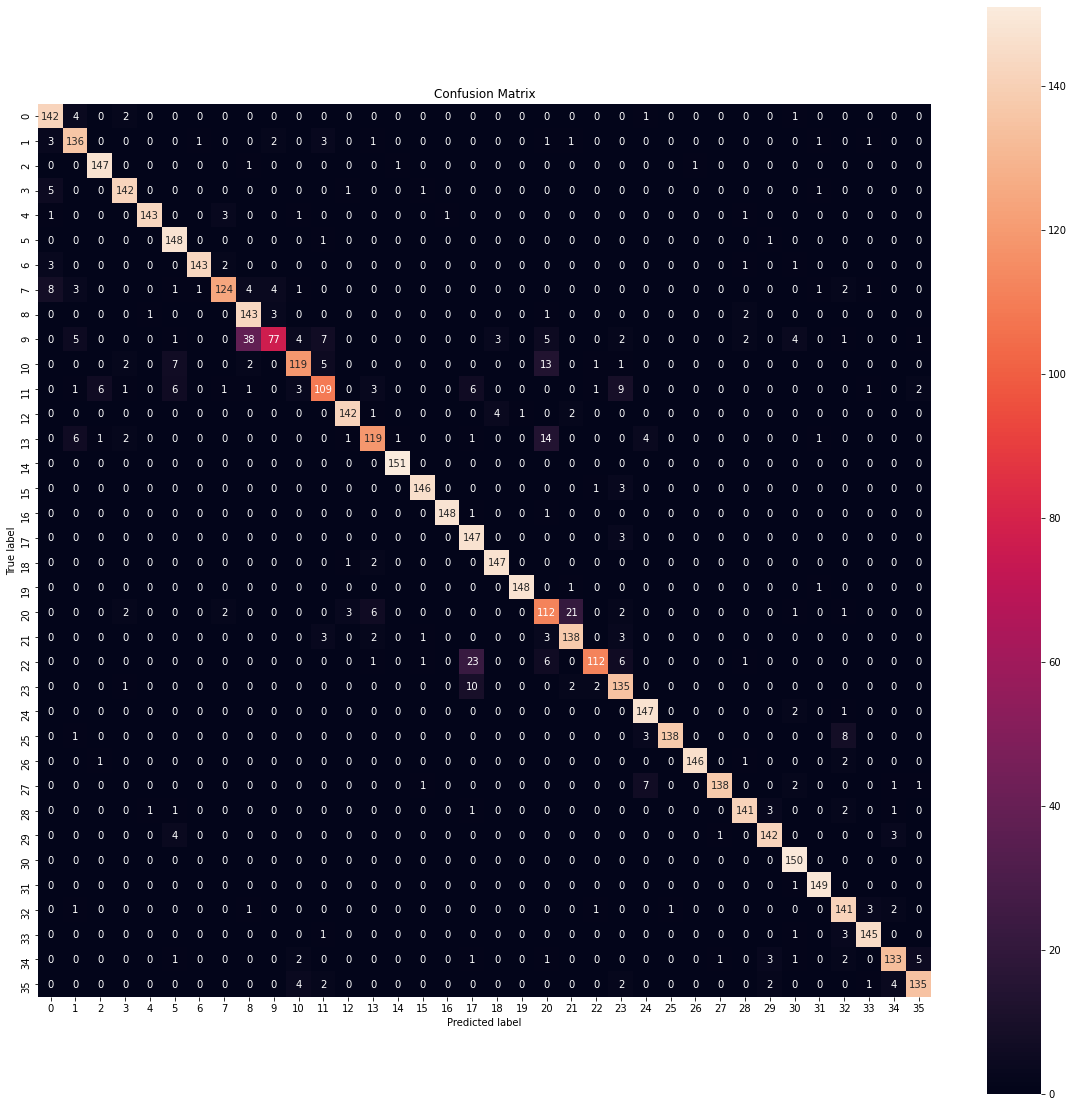

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm,annot=True,square= True,fmt ='d',cbar = True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

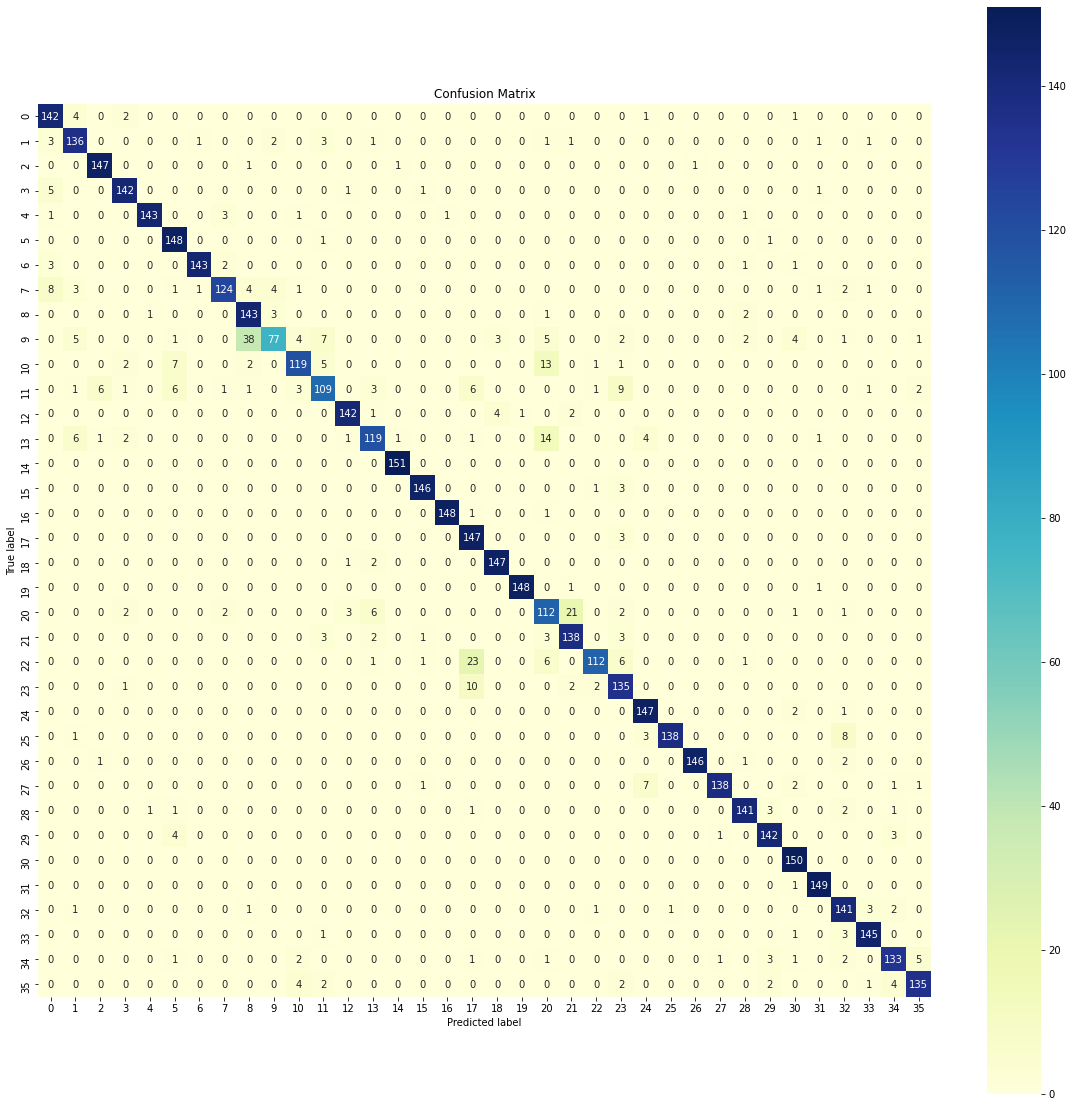

In [ ]:
# Try another color map (cmap)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm,annot=True,square= True,fmt ='d',cbar = True,cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


Why heatmap doesn't support devanagari font
-  Solution available for chinese font [here](https://github.com/mwaskom/seaborn/issues/1009)

In [ ]:
# Approach 1
cm_df = pd.DataFrame(cm,class_names,class_names)
cm_df.head()

,क,कं,कः,का,कि,की,कु,कू,के,कै,को,कौ,ख,खं,खः,खा,खि,खी,खु,खू,खे,खै,खो,खौ,ग,गं,गः,गा,गि,गी,गु,गू,गे,गै,गो,गौ
क,142,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
कं,3,136,0,0,0,0,1,0,0,2,0,3,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
कः,0,0,147,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
का,5,0,0,142,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
कि,1,0,0,0,143,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(cm_df, annot=True)
plt.show()

In [ ]:
class_names_ =['ka','ka','ki','kee','ku','koo','ke','kai','ko','kau','kam','kah','kha','kha','khi','khee','khu','khoo','khe','khai','kho','khau','kham','khah','ga','gaa','gi','gee','gu','goo','ge','gai','go','gau','gam','gah']
len(class_names_)

36

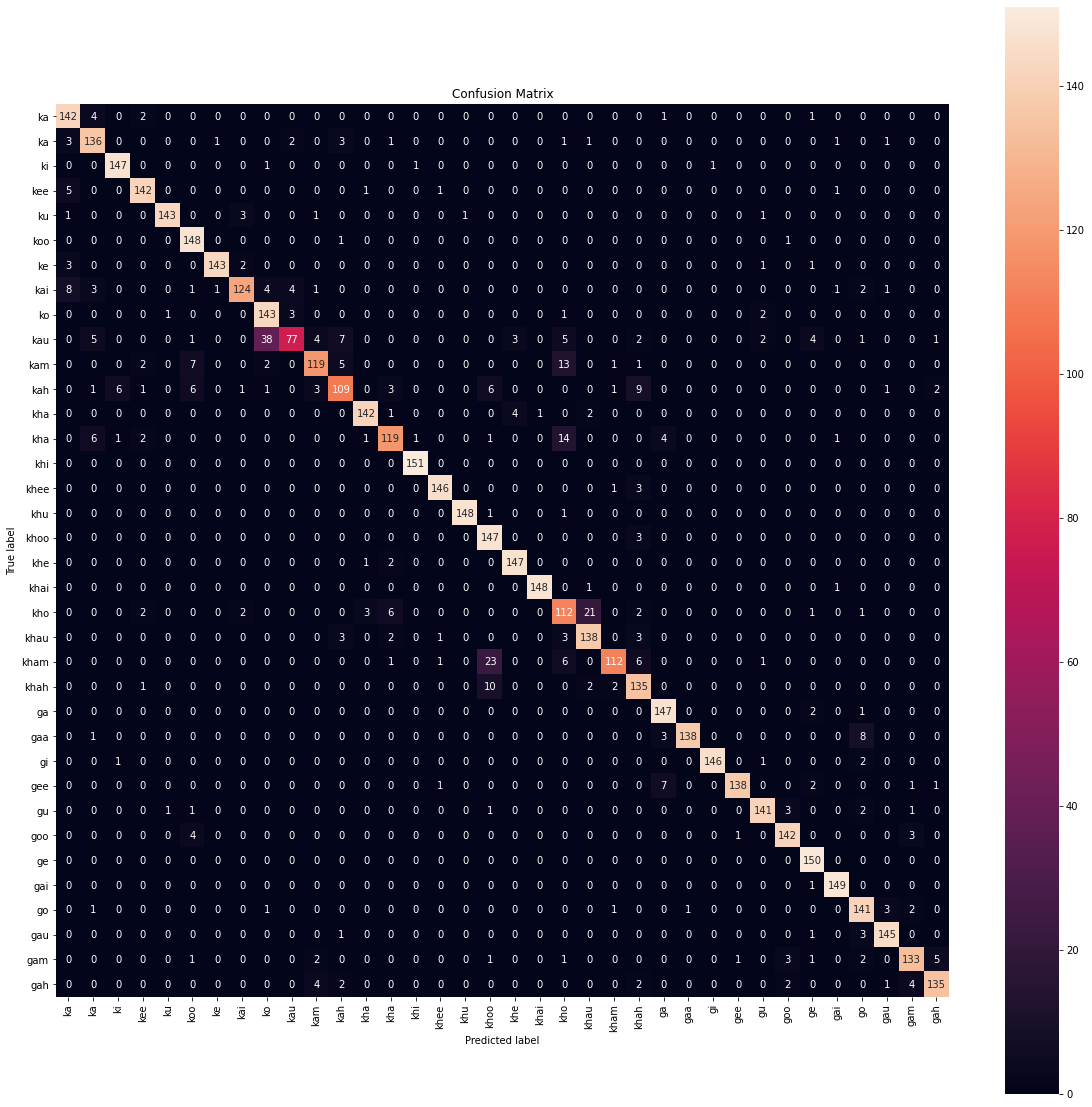

In [ ]:
# Approach 2
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(cm,annot=True,square= True,fmt ='d',cbar = True )
ax.xaxis.set_ticklabels(class_names_,rotation =90 )
ax.yaxis.set_ticklabels(class_names_,rotation =0)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


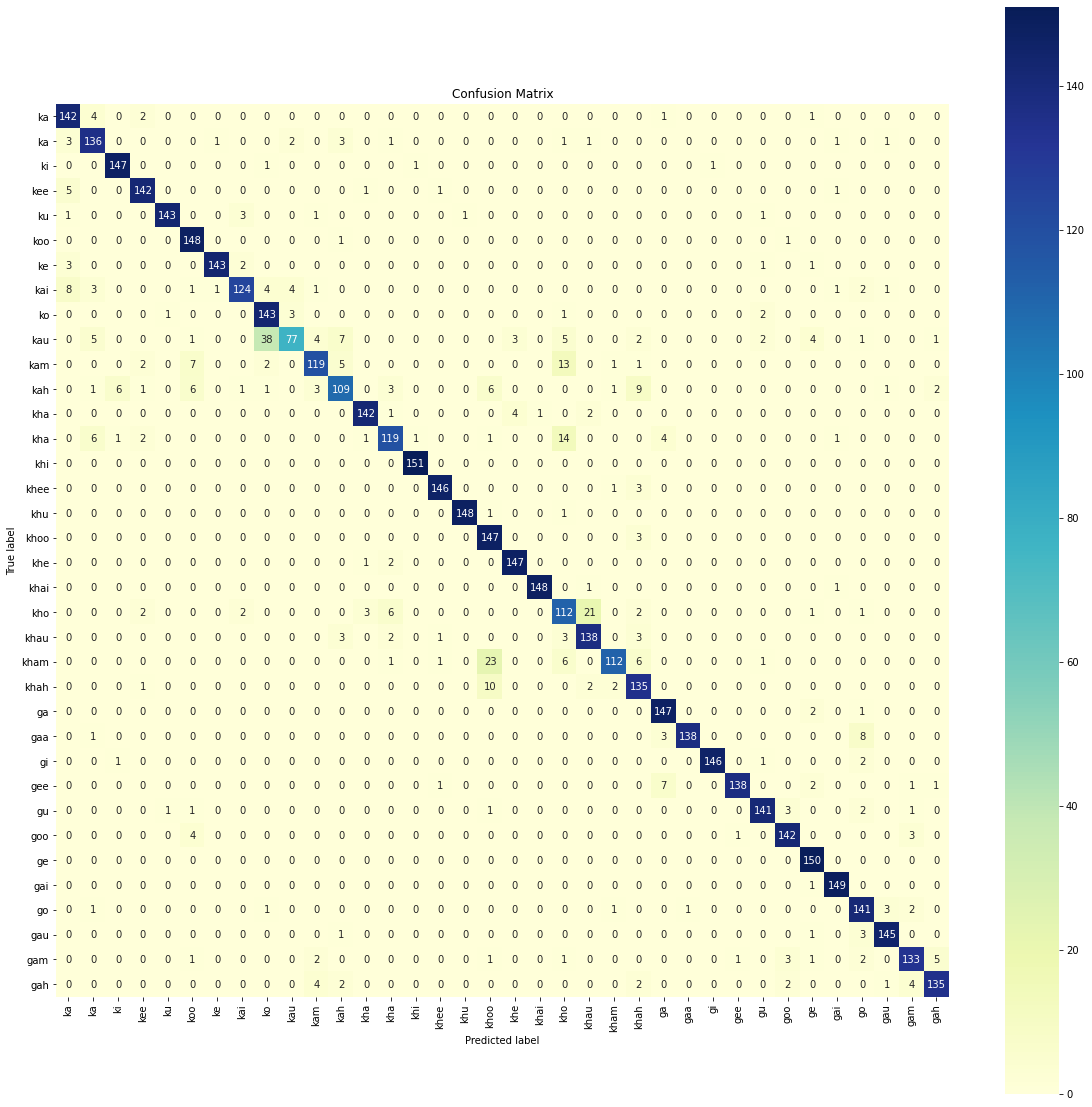

In [ ]:
# Approach 3
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm,annot=True,square= True,fmt ='d',cbar = True,cmap="YlGnBu")
ax.xaxis.set_ticklabels(class_names_,rotation =90 )
ax.yaxis.set_ticklabels(class_names_,rotation =0)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

Let rename Devanagari classes to Roman and label them on Confusion Matrix

### Plotting classification report

In [ ]:
cr =  classification_report(testing_data_generator.classes,test_pred_)
cr

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94       400\n           1       0.87      0.99      0.93       400\n           2       0.90      0.99      0.94       400\n           3       0.99      0.93      0.96       400\n           4       0.90      0.95      0.92       400\n           5       0.77      0.99      0.87       400\n           6       0.99      0.95      0.97       400\n           7       0.96      0.94      0.95       400\n           8       0.94      0.98      0.96       400\n           9       0.89      0.98      0.93       400\n          10       0.80      0.99      0.89       400\n          11       0.97      0.95      0.96       400\n          12       0.92      0.95      0.94       400\n          13       0.96      0.98      0.97       400\n          14       0.97      0.76      0.85       400\n          15       0.90      0.96      0.93       400\n          16       0.80      1.00      0.89       400\n       

-1

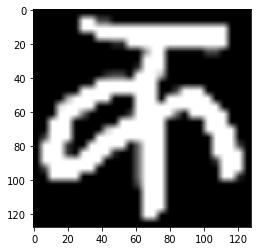

In [ ]:
# testing
import cv2
img = cv2.imread('/content/drive/MyDrive/npn_warehouse/testing_data/ka_15.png',3)
img = cv2.resize(img,(128,128))
plt.imshow(img)